## Análise Inferencial - Inferencial Analysis
- **Definição simples e clara:** Usa uma amostra de dados para fazer afirmações ou estimativas sobre uma população maior​. Por exemplo, pode estimar a média populacional ou testar hipóteses (como se duas médias são diferentes) com base em amostras aleatórias. Em essência, a análise inferencial responde perguntas do tipo “o que estes dados nos dizem sobre toda a população?”, considerando incertezas estatísticas​.

- **Aplicações práticas:** pesquisas de opinião (entrevista alguns eleitores para inferir intenção de voto do país); ensaios clínicos (testar um novo medicamento em 100 pacientes para estimar seu efeito na população); controle de qualidade (examinar amostras de produtos na fábrica para decidir se toda a linha está boa); A/B tests em marketing/web (testar dois anúncios em amostras de usuários para inferir qual traz mais conversão). Essas aplicações usam médias amostrais, intervalos de confiança e testes de hipótese para generalizar além dos dados coletados.

- **Exemplo prático:** Uma empresa de alimentos faz uma pesquisa com uma amostra de 200 consumidores para avaliar a satisfação com um novo produto. Com esses dados, ela calcula um intervalo de confiança para a proporção de clientes satisfeitos na população inteira, e faz um teste de hipótese para decidir se a satisfação é significativamente maior que 50%. Mesmo sem entrevistar todo mundo, aprende-se algo sobre o mercado amplo.

- **Principais ferramentas/técnicas:** testes estatísticos (t de Student, qui-quadrado, ANOVA), estimativas de intervalos de confiança, regressões lineares para relações entre variáveis, machine learning básico (como regressão logística) para inferir probabilidades, e bibliotecas estatísticas em R (pacote stats) ou Python (SciPy, statsmodels). Softwares especializados (SPSS, SAS, STATA) também são comuns para cálculos avançados de inferência.

---

### Exemplo prático de Análise Inferencial em Python

**Empresa: Construtora LTDA**
**Faturamento total por ano**
- Faturamento 2020: $ 8.500.000,00 
- Faturamento 2021: $ 7.450.000,00 
- Faturamento 2022: $ 6.800.000,00 
- Faturamento 2023: $ 8.000.500,00 
- Faturamento 2024: $ 8.500.000,00 

**Custo médio total por ano**
- Custo 2020: 82% do faturamento 
- Custo 2021: 78% do faturamento 
- Custo 2022: 85% do faturamento 
- Custo 2023: 77,5% do faturamento 
- Custo 2022: 76,9% do faturamento 

**Distribuição Percentual Estimada dos Custos da Construção:**
- Materiais: 50% dos custos total da obras. 
- Mão de Obra: 30% dos custos total da obras. 
- Projetos e Taxas: 5% dos custos total das obras. 
- Imprevistos (Reserva Técnica): 5% dos custos total estimado. 
---

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

# Dados fornecidos
years = np.array([2020, 2021, 2022, 2023, 2024])
revenues = np.array([8.5e6, 7.45e6, 6.8e6, 8.0005e6, 8.5e6])
cost_ratios = np.array([0.82, 0.78, 0.85, 0.775, 0.769])

# 1) Teste t de Student (comparando a média do custo % com 80%)
t_stat, p_val = stats.ttest_1samp(cost_ratios, popmean=0.80)

# 2) ANOVA (comparando custo % entre anos <=2021 vs >=2022)
group1 = cost_ratios[years <= 2021]
group2 = cost_ratios[years >= 2022]
F_stat, p_anova = stats.f_oneway(group1, group2)

# 3) Qui-Quadrado (comparamos distribuição de custos em categorias entre 2020 e 2024)
cost_amounts = cost_ratios * revenues
cat_labels = ['Materiais', 'Mão de Obra', 'Projetos e Taxas', 'Imprevistos']
cat_distribution = np.array([0.5, 0.3, 0.05, 0.05])
obs_2020 = cost_amounts[0] * cat_distribution
obs_2024 = cost_amounts[-1] * cat_distribution
contingency_table = np.vstack([obs_2020, obs_2024])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency_table)

# 4) Regressão Linear (faturamento ~ ano)
df = pd.DataFrame({'Year': years, 'Revenue': revenues})
model = smf.ols('Revenue ~ Year', data=df).fit()
params = model.params
conf_int = model.conf_int()

# Exibição de resultados
results = pd.DataFrame({
    'Teste': ['t-de-Student', 'ANOVA', 'Qui-Quadrado'],
    'Estatística': [t_stat, F_stat, chi2],
    'p-valor': [p_val, p_anova, p_chi]
})

display(results)
print("\nTabela de contingência (observada e esperada) para 2020 vs 2024:")
obs_df = pd.DataFrame(contingency_table, index=['2020', '2024'], columns=cat_labels)
exp_df = pd.DataFrame(expected, index=['2020', '2024'], columns=cat_labels)
display(obs_df, exp_df)

print("\nRegressão Linear: parâmetros e intervalos de confiança (95%)")
params_df = pd.DataFrame({
    'Coeficiente': params,
    'IC 2.5%': conf_int[0],
    'IC 97.5%': conf_int[1]
})
display(params_df)

print("\nSumário do modelo:\n")
print(model.summary())


,Teste,Estatística,p-valor
0,t-de-Student,-0.076832,0.942447
1,ANOVA,0.002954,0.960070
2,Qui-Quadrado,0.000000,1.000000



Tabela de contingência (observada e esperada) para 2020 vs 2024:


,Materiais,Mão de Obra,Projetos e Taxas,Imprevistos
2020,3485000.0,2091000.0,348500.0,348500.0
2024,3268250.0,1960950.0,326825.0,326825.0


,Materiais,Mão de Obra,Projetos e Taxas,Imprevistos
2020,3485000.0,2091000.0,348500.0,348500.0
2024,3268250.0,1960950.0,326825.0,326825.0



Regressão Linear: parâmetros e intervalos de confiança (95%)


,Coeficiente,IC 2.5%,IC 97.5%
Intercept,-1.034610e+08,-1.805915e+09,1.598993e+09
Year,5.505000e+04,-7.869151e+05,8.970151e+05



Sumário do modelo:

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.314
Method:                 Least Squares   F-statistic:                   0.04330
Date:                Mon, 28 Apr 2025   Prob (F-statistic):              0.848
Time:                        09:46:08   Log-Likelihood:                -74.003
No. Observations:                   5   AIC:                             152.0
Df Residuals:                       3   BIC:                             151.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.035e+08   5.35e+0

d:\PROJECTS\Statistics\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Interpretação dos dados:

1) Teste t de Student
- **Hipótese:** A média do percentual de custos anuais difere de 80% do faturamento.
- **Estatística t e p-valor:** mostram se rejeitamos H₀ (média = 80%).
- Se p-valor < 0.05, consideramos a diferença estatisticamente significativa.

2) ANOVA
- Comparamos dois valores de (2020-2021 vs. 2022-2024) para ver se o percentual médio de custo difere.
- A estatística F e o p-valor identificam se há variança significativa entre esses períodos.

3) Qui-Quadrado
- Construímos uma tabela de contigência com os custos distribuídos em 4 categorias (Materiais, Mão de Obra, Projeto e Taxas, Imprevistos) para os anos de 2020 e 2024.
- O teste chi2 verifica se a distribuição observada difere da esperada (sob a hipótese de independência entre ano e categoria).

4) Regressão Linear
- Modelamos o faturamento ao longo dos anos.
- O output inclui coeficiente angular ("Year") e intercepto, bem como seus intervalos de confiança a 95%.
- O R² indica quão bem o ano explica a variação no faturamento (neste caso, muito baixo, o que sugere pouca relação linear).
---

C:\Users\jonat\AppData\Local\Temp\ipykernel_15148\2946848562.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cost_ratios * 100, labels=['% Custos'])


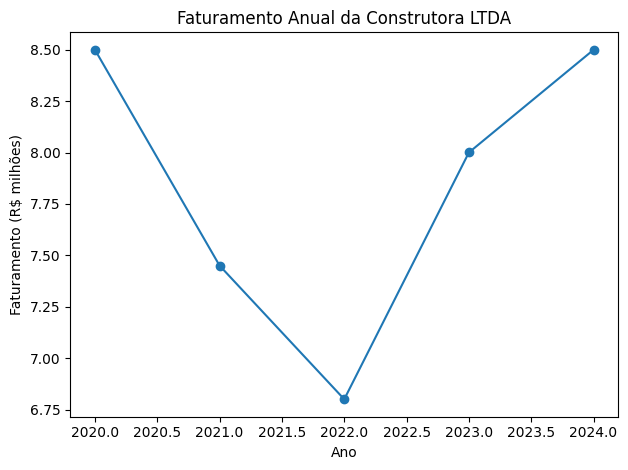

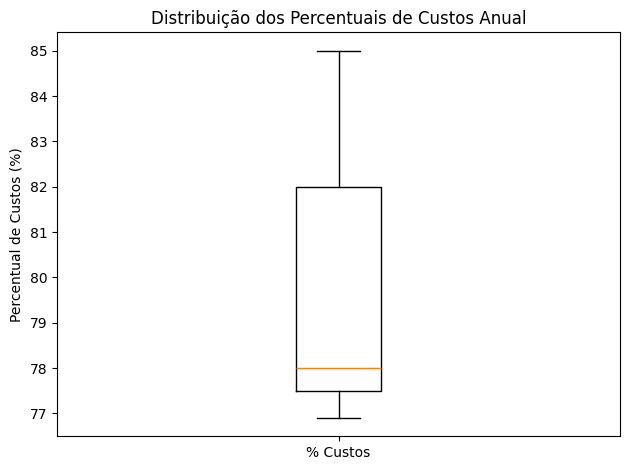

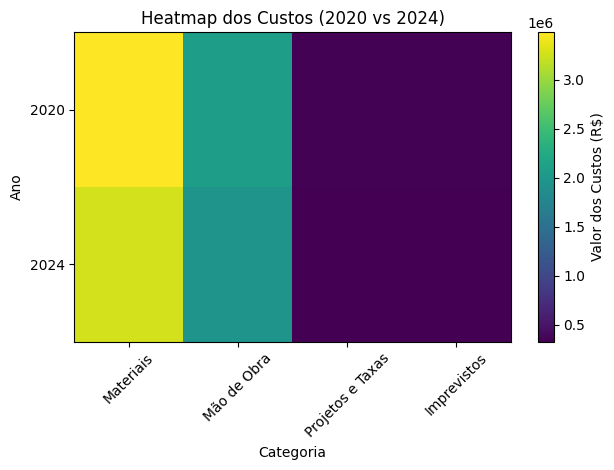

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
years = np.array([2020, 2021, 2022, 2023, 2024])
revenues = np.array([8.5e6, 7.45e6, 6.8e6, 8.0005e6, 8.5e6])
cost_ratios = np.array([0.82, 0.78, 0.85, 0.775, 0.769])
cat_distribution = np.array([0.5, 0.3, 0.05, 0.05])

cost_amounts = cost_ratios * revenues
obs_2020 = cost_amounts[0] * cat_distribution
obs_2024 = cost_amounts[-1] * cat_distribution
contingency = np.vstack([obs_2020, obs_2024])
labels = ['Materiais', 'Mão de Obra', 'Projetos e Taxas', 'Imprevistos']

# 1) Gráfico de Linha: Faturamento ao longo dos anos (em milhões)
plt.figure()
plt.plot(years, revenues / 1e6, marker='o')
plt.title('Faturamento Anual da Construtora LTDA')
plt.xlabel('Ano')
plt.ylabel('Faturamento (R$ milhões)')
plt.tight_layout()

# 2) Boxplot: Distribuição dos percentuais de custo anual
plt.figure()
plt.boxplot(cost_ratios * 100, labels=['% Custos'])
plt.title('Distribuição dos Percentuais de Custos Anual')
plt.ylabel('Percentual de Custos (%)')
plt.tight_layout()

# 3) Heatmap de Contingência: Custos por categoria em 2020 vs 2024
plt.figure()
plt.imshow(contingency, aspect='auto')
plt.title('Heatmap dos Custos (2020 vs 2024)')
plt.xlabel('Categoria')
plt.ylabel('Ano')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
plt.yticks(ticks=[0, 1], labels=['2020', '2024'])
plt.colorbar(label='Valor dos Custos (R$)')
plt.tight_layout()

plt.show()


1) Gráfico de Linha:
- Mostra a evolução do faturamento (em R$ milhões) de 2020 a 2024.
- Ajuda a identificar tendência de queda até 2022 e recuperação nos anos seguintes.

2) Boxplot:
- Exibe a distribuição dos percentuais de custo anual (%) ao longo dos cincos anos.
- Permite ver mediana, quartis e possíveis valores atípicos na alocação de custos.

3) Heatmap de Contigência:
- Compara, por categoria de custo (Materiais, Mão de Obra, Projetos e Taxas, Imprevistos), os valores absolutos de 2020 e 2024.
- Facilita a visualização de quais categorias tiveram maior variação em valores entre esses dois pontos.